```{warning}
This is still a draft! Please refer to the PDF version.
```

(excursus)=
# Excursus: An Algorithmic Archaeology of a Living Corpus: GerDraCor as a Dynamic Epistemic Object

While we have shown in section {ref}`section-3-2` that Git commits can be used as stable references to states of living corpora and thus as a mechanism for transparent versioning, in section 3.3 we explored in more detail which information about corpora and corpus files can be queried using the GitHub API. Our explorations in section {ref}`section-3-3` have also demonstrated that the use of Git not only provides a powerful versioning tool for CLS corpora, but that this use of the [API](https://docs.github.com/en/rest?apiVersion=2022-11-28) generates a large amount of additional (technical) metadata about corpora. In the following excursus, we use this metadata for a more in-depth analysis of the genesis of a DraCor corpus (namely “GerDraCor”), taking the Git commit history as a basis. 

For this analysis, we developed a set of functions written in Python. The functionality of this prototype[^our_understanding_of_prototype] of a tool is bundled as methods of the class `GitHubRepo` contained in the module [`github_utils`](github_utils.py). 

[^our_understanding_of_prototype]:On our “reflective prototyping approach” cf. {cite:p}`boerner_2023_report{p. 9ff}`.

In [1]:
# This is needed to re-use outputs of code in the markdown cells. 
# This cell is removed in the rendered report
from myst_nb import glue

In [2]:
# To see logging messages (only info logs or for debugging) 
# uncomment the import statement and the respective line

#import logging
#logging.basicConfig(level=logging.DEBUG)
#logging.basicConfig(level=logging.INFO)

In [3]:
# The methods needed for the following analysis are bundled as the class "GitHubRepo" 
# which we import in with the following line

from github_utils import GitHubRepo

# The number of requests that can be sent to the GitHub API anonymously is very limited 
# see https://docs.github.com/en/rest/using-the-rest-api/rate-limits-for-the-rest-api?apiVersion=2022-11-28 
# We need to send a token (stored in an environment variable here) 
# by supplying the token with each request to identify ourselves to the API 
# and thus having a higher limit of requests. 

import os
github_token = os.environ.get("GITHUB_TOKEN")

The aim of this analysis is twofold: On the one hand, we want to use a particular example to demonstrate what it means that in CLS we are occasionally dealing with living corpora. On the other hand, we want to use the analysis to illustrate the power of Git-based versioning and the metadata generated in this process, not least against the background that this might also open up new research perspectives on the epistemic objects of CLS (now understood as technical objects). An executable (and thus fully reproducible) version of this analysis is accessible on GitHub. In addition, we are convinced that an in-depth knowledge of the constitution of a data set is necessary when wanting to repeat the research based on this data. If the data has changed in the meantime between the original research and the repeating research knowing what exactly changed in the data can help to understand possible deviations in results and allows that informed counter-measures can be taken.  

As already mentioned, the “German Drama Corpus” (“GerDraCor”) will serve as our showcase. The corpus’ repository is available at
https://github.com/dracor-org/gerdracor 

The German Drama Corpus (GerDraCor) will serve as a test case. The corpus' repository is available at [https://github.com/dracor-org/gerdracor](https://github.com/dracor-org/gerdracor). 

In [4]:
# we have to provide the repository name

repository_name = "gerdracor"

In [5]:
# glue it to later reuse it in markdown cells
# This code cell won't end up in the final rendering

glue("repository_name", repository_name)

'gerdracor'

The first step in the analysis consists in downloading all data on all commits from GitHub. Depending on the overall number of commits this can take a long time. In a previous attempt fetching and preparing the data of GerDraCor from GitHub with the code in the code cell below took 53min 29s to execute the operation. 

The following code cell containes the code that was used to initiate the download. 

In [6]:
#%%time
# Uncomment the Jupyter magic keyword above to have the operation timed

# The following line of code downloads and prepares the data 
# when initializing the a new instance of the class  "GitHubRepo 
# which provides the methods to analyze a corpus repository

#repo = GitHubRepo(repository_name=repository_name, github_access_token=github_token, download_and_prepare_data=True)

The tool allows for importing previously downloaded and enriched data from disk which is way faster than retrieving the data via the GitHub API (see the following code cell).

In [7]:
# List the contents of the tmp folder for reference here
# This cell is removed in the final rendering

!ls tmp

gerdracor_commits.json              gerdracor_corpus_versions.json
gerdracor_commits_detailed.json     gerdracor_data_folder_objects.json


In [8]:
# Start the analysis with previously downloaded data

repo = GitHubRepo(repository_name=repository_name, 
                  github_access_token=github_token,
                  import_commit_list="tmp/gerdracor_commits.json",
                  import_commit_details="tmp/gerdracor_commits_detailed.json",
                  import_data_folder_objects="tmp/gerdracor_data_folder_objects.json",
                  import_corpus_versions="tmp/gerdracor_corpus_versions.json")

In [9]:
# Get the number of commits in the dowloaded data to reuse in the markdown cell
# This cell is removed from the final rendering

commits_count = len(repo.get_commits())
corpus_versions_count = len(repo.get_corpus_versions().keys())

# Sanity check the data: The number of versions should be equal to the number of commits
assert commits_count == corpus_versions_count, "The number of commits and versions do not match"

glue("commits_count", commits_count)
glue("corpus_versions_count", corpus_versions_count)

1492

1492

The following analysis will be based on data in the folder `tmp` that was downloaded on Feb. 14th 2024. When the data was downloaded the GitHub Repository {glue:text}`repository_name` contained {glue:text}`commits_count` commits. We consider each commit being an implicit version of a corpus and therefore we have {glue:text}`corpus_versions_count` versions of the German Drama Corpus up to this date. 

(excursus-gerdracor-birth)=
## 3.1 The "Birth" of GerDraCor

From the commit history of the repository of the German Drama Corpus we can retrieve the very first commit.

In [10]:
# The commits are ordered chronologically starting from the most recent commit; 
# the initial commit one is the last element in the list of commits that can be retrieved
# with the method get_commits()
# we can use this identfier in the field with the key "sha" to then get the first version 
# of the corpus with the function get_corpus_version 
# and passing the sha value as the keyword argument "version" 
# like repo.get_corpus_version(version={sha})

repo.get_commits()[-1:][0]

{'sha': '2f4e830a852960eba8e05d6b622b3bd64911ab69',
 'node_id': 'MDY6Q29tbWl0NzUzMTY1Mjk6MmY0ZTgzMGE4NTI5NjBlYmE4ZTA1ZDZiNjIyYjNiZDY0OTExYWI2OQ==',
 'commit': {'author': {'name': 'Mathias Göbel',
   'email': 'goebel@sub.uni-goettingen.de',
   'date': '2016-12-02T09:31:24Z'},
  'committer': {'name': 'Mathias Göbel',
   'email': 'goebel@sub.uni-goettingen.de',
   'date': '2016-12-02T09:31:24Z'},
  'message': 'inital commit: converted text based on LINA and TextGrid',
  'tree': {'sha': '4ee5a502cb8412e2f1f3700bb629d17768a421ef',
   'url': 'https://api.github.com/repos/dracor-org/gerdracor/git/trees/4ee5a502cb8412e2f1f3700bb629d17768a421ef'},
  'url': 'https://api.github.com/repos/dracor-org/gerdracor/git/commits/2f4e830a852960eba8e05d6b622b3bd64911ab69',
  'comment_count': 0,
  'verification': {'verified': False,
   'reason': 'unsigned',
   'signature': None,
   'payload': None}},
 'url': 'https://api.github.com/repos/dracor-org/gerdracor/commits/2f4e830a852960eba8e05d6b622b3bd64911ab69',

In [11]:
# Make the sha of the first commit available
# This cell is not displayed in the final rendering

first_commit = repo.get_commits()[-1:][0]

# ID
glue("first_commit_sha", first_commit["sha"])

# Name of person to perform the first commit
glue("first_commit_by", first_commit["commit"]["author"]["name"])

# Date (parsed to datetime)
from datetime import datetime 
first_commit_date = datetime.fromisoformat(first_commit["commit"]["author"]["date"])
# TODO: It would be a nice feature to get a datetime object directly from a github_utils method

# Date of first commit
glue("first_commit_date_formatted", first_commit_date.strftime("%-d %B, %Y"))

# Message
glue("first_commit_message", first_commit["commit"]["message"])


'2f4e830a852960eba8e05d6b622b3bd64911ab69'

'Mathias Göbel'

'2 December, 2016'

'inital commit: converted text based on LINA and TextGrid'

This initial commit to the repository which is identfied by the SHA value {glue:text}`first_commit_sha` was committed by {glue:text}`first_commit_by` (during a hackathon at the University of Potsdam) and dates from {glue:text}`first_commit_date_formatted`.

In [12]:
# Generate a GitHub Link to the first commit
# In the final rendering the input will be removed
# unfortunately, this link is not clickable
# remove it from the final rendering until there is a solution to it

print(repo.get_github_commit_url_of_version(version=first_commit["sha"]))

https://github.com/dracor-org/gerdracor/commit/2f4e830a852960eba8e05d6b622b3bd64911ab69


In [13]:
# Get some info about the version
# This cell is removed from the final rendering

first_corpus_version = repo.get_corpus_version(version=first_commit["sha"])
glue("first_corpus_version_data_folder_name", first_corpus_version["data_folder_name"])
glue("first_corpus_version_document_count", first_corpus_version["document_count"])

'tei'

465

With this commit {glue:text}`first_corpus_version_document_count` TEI-XML files were added to a data folder with the name {glue:text}`first_corpus_version_data_folder_name`. The commit message "{glue:text}`first_commit_message`" already reveals the intial source of the data of the corpus: *LINA* is short for "Literary Network Analysis" and was the format developed in the project [DLINA](https://dlina.github.io).[^about_dlina_project]

[^about_dlina_project]: The project members included Frank Fischer, Mathias Göbel, Dario Kampkaspar, Christopher Kittel and Peer Trilcke. The output of the project is well documented on the project's [Blog](https://dlina.github.io), the data and tools are available on GitHub at [https://github.com/dlina](https://github.com/dlina). The term *LINA* as an abbreviation of the German "Literarische Netzwerkanalyse" (Literary Network Analysis) first appeared in print in the publication {cite:p}`trilcke_2013_sna`.

In the DLINA project research on dramatic texts was based on derivatives of the full-texts taken from the [TextGrid Repository](https://textgridrep.org). The "LINA files" included only metadata on the dramatic texts (e.g. date of publication) and very detailed structural information on the segmentation (acts, scenes) also containing the information on which characters appear in which structural segment. Thus, the [Zwischenformat](https://dlina.github.io/Introducing-Our-Zwischenformat)-Files (i.e., files in an intermediary format) allowed for the extraction of networks based on the co-occurence of characters in the same structural segment (cf. {cite:t}`kampkaspar_2015_zwischenformat`). The DLINA project officially released their corpus of 465 plays before the Digital Humanities DH2015 conference in Sydney. This corpus is also refered to as "Sydney Corpus" or the corpus with the "Codename Sydney". Unlike the current practice in DraCor, DLINA used Git Tags[^tags_explained] on corpus data. In the [GitHub Repository of the DLINA Corpus](https://github.com/dlina/project) there is a single tagged version `15.07-sydney`: [https://github.com/dlina/project/releases/tag/15.07-sydney](https://github.com/dlina/project/releases/tag/15.07-sydney)

The respective [commit](https://github.com/dlina/project/commit/cca01b501a1a294772c2a6a9fe38944b930eea03) `cca01b501a1a294772c2a6a9fe38944b930eea03` (of the DLINA repository!) adds a RelaxNG schema describing the "Zwischenformat". Although this dates from 31 August, 2016, this version number was already introduced more than a year before in a Blog-Post dating from June 20, 2015. The Blog-Post explains it as such:

> The version number 15.07 is referring to ‘July 2015’ as we’re going to present our results at the DH2015 conference on July 2, 2015. Further versions of the DLINA Corpus will receive according versioning numbers. {cite:p}`fischer_2015_dlina-corpus`

Ultimately, at least in the published data in the DLINA organization on GitHub the (good) plan to assign further version numbers was not implemented.

[^tags_explained]:An explaination of a ["Git Tag"](https://git-scm.com/docs/gitglossary#Documentation/gitglossary.txt-aiddeftagatag) can be found in the glossary of the Git Documentation. See also [https://git-scm.com/book/en/v2/Git-Basics-Tagging](https://git-scm.com/book/en/v2/Git-Basics-Tagging).

Even when GerDraCor was already in the making the DLINA corpus continued to be used as the basis for research by people invoved in DLINA. This can be seen in the paper "Network Dynamics, Plot Analysis. Approaching the Progressive Structuration of Literary Texts" {cite:p}`fischer_2017_network-dynamics` which was presented at the Digital Humanitites Conference in Montréal in 2017. The submission deadline was already in November 2016 and dates prior to the first commit in the GerDraCor repository. The conference took place in August 2017 when the work on GerDraCor was already ongoing. 

Although the analysis conducted for the presenation is not based on GerDraCor but on the DLINA corpus in the published [slides](https://dlina.github.io/presentations/2017-montreal) of the conference presentation there can already be seen a glipse of the emerging wider DraCor ecosystem. The slides [mention](https://dlina.github.io/presentations/2017-montreal/#/1/3) the  *Russian Drama Corpus* (RusDraCor).[^rusdracor_first_presentation]

[^rusdracor_first_presentation]: The Russian Drama Corpus has already been presented prior to the 2017 Montréal conference. Frank Fischer and members of his junior research group at the Higher School of Economics in Moscow preseanted a paper with the title "Introducing RusDraCor" at a conference in St. Petersburg on June 29, 2017. This initial version of the corpus included 66 Russian plays. In the [slides](https://dlina.github.io/presentations/2017-spb) to this presentation the authors already point to the "dracor-org" organization on GitHub when they explain how to get the corpus (see https://dlina.github.io/presentations/2017-spb/#/2/4).

The files in the first commit to the GerDraCor repository re-include the the full text of the play from the Textgrid source in the element `<text>`, but in the `<teiHeader>` the metadata of the LINA files. The metadata is transformed from the custom intermediary format ("Zwischenformat") that was used in the DLINA project to an XML encoding following the Guidelines of the Text Encoding Initiative (TEI Guidelines).

(excursus-gerdracor-growth)=
## A Living Corpus “Growing”

In [14]:
# The size of the corpus in documents as a pandas data frame 
# can be retrieved with the method get_corpus_versions_as_df
# This cell will removed from the final reandering

corpus_num_of_docs_df = repo.get_corpus_versions_as_df(columns=["date_from","id","document_count"]).set_index("date_from")
corpus_num_of_docs_df

,id,document_count
date_from,,
2016-12-02 09:31:24+00:00,2f4e830a852960eba8e05d6b622b3bd64911ab69,465
2016-12-08 10:38:16+00:00,dc0e11872fe1437f564137fe377cb43675eead90,465
2016-12-08 14:56:21+00:00,106fefd275c20c5b673a326e89647f7511ba9f76,465
2016-12-16 22:57:08+00:00,97b9d67c84332b8a47da7177e38607589755ccab,465
2016-12-17 13:56:23+00:00,792e255281e6075608f235847bce73ee530f49f3,465
...,...,...
2024-02-04 14:11:47+00:00,231412fec0a5c06832ab1c34fb01e49d52d5248c,675
2024-02-05 13:33:16+00:00,7799cc0a089a0727fdae7511cf76ad40d9370462,675
2024-02-07 19:44:36+00:00,1a2bd807973f3bf052eee45eb343c7a752bd61bb,676


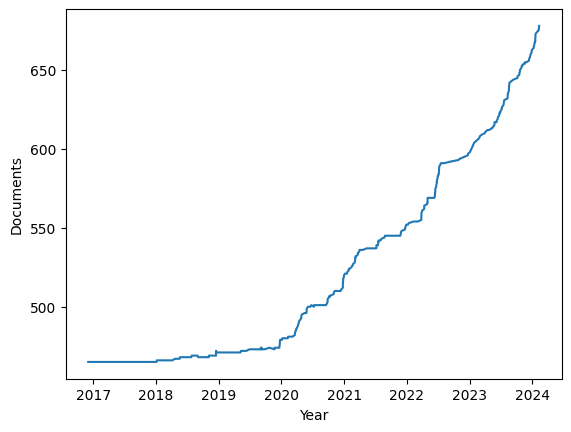

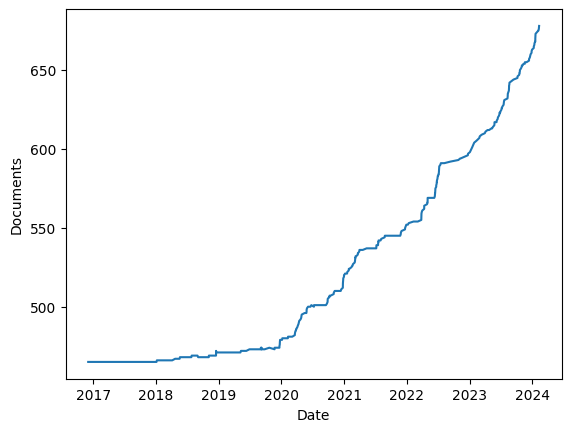

In [15]:
# A quick way to plot the development of a corpus in way of documents
# This cell will be removed from the final rendering
repo.plot_documents_in_corpus_versions()

# But to better control the plot:
import pandas as pd
import matplotlib.pyplot as plt

# We need to have this redone as a "glue-able" figure
fig_num_corpus_documents = plt.figure()

plt.ylabel("Documents", figure=fig_num_corpus_documents)
plt.xlabel("Date", figure=fig_num_corpus_documents)

plt.plot(corpus_num_of_docs_df["document_count"], figure=fig_num_corpus_documents)

glue("fig_num_corpus_documents", fig_num_corpus_documents, display=False)

Figure {numref}`fig_num_corpus_documents` shows the development of the number of plays included in the corpus versions of GerDraCor. It can be seen from the plot that in 2018 the corpus slowly begins to grow.

```{glue:figure} fig_num_corpus_documents
---
figwidth: 800px
name: fig_num_corpus_documents
---
Development of the number of documents in  all versions in GerDraCor
```

In [16]:
# Get the number of plays added per year
# This cell is removed from the final output

# We need the dataframe without the date from as index to better filter on the date
# This overwrites the data frame with the date from as index
corpus_num_of_docs_df = repo.get_corpus_versions_as_df(columns=["date_from","id","document_count"])

years = range(2016,2025)
num_of_docs_max_per_year = []
documents_added = []

pref_year_max = 0
for year in years:
    year_max = corpus_num_of_docs_df.loc[(corpus_num_of_docs_df["date_from"] >= f"{str(year)}-01-01")
                     & (corpus_num_of_docs_df["date_from"] < f"{str(year)}-12-31")]["document_count"].max()
    num_of_docs_max_per_year.append(year_max)
    documents_added_val = year_max - pref_year_max
    documents_added.append(documents_added_val)

    pref_year_max = year_max

data = dict(
    year=years,
    new=documents_added,
    overall=num_of_docs_max_per_year,
)

documents_per_year_df = pd.DataFrame(data).set_index("year")
glue("tab_new_plays_per_year", documents_per_year_df)

,new,overall
year,,
2016,465,465
2017,0,465
2018,7,472
2019,7,479
2020,41,520
2021,32,552
2022,45,597
2023,66,663
2024,15,678


The table in figure {numref}`tab_new_plays_per_year` lists the number of plays being added per year from 2016 to 2024 which shows that from 2020 (the year the COVID19 pandemic began) onwards the number of plays added per year grows significantly.

```{glue:figure} tab_new_plays_per_year
---
name: tab_new_plays_per_year
---
Plays added to GerDraCor per year
```

The “growth” of the corpus – to a certain extent – also results from diversifying the digital sources of which data is included. 

In [17]:
# Which version first adds a play?
# We also use this to introduce the diversification of the source
# This cell will not end up in the final rendering

first_version_with_more_than_dlina_plays_id = corpus_num_of_docs_df[corpus_num_of_docs_df["document_count"] > 465]["id"].iloc[0]
glue("first_version_with_more_than_dlina_plays_id", first_version_with_more_than_dlina_plays_id)

#corpus_num_of_docs_df[corpus_num_of_docs_df["document_count"] > 465]
#corpus_num_of_docs_df.index[corpus_num_of_docs_df["document_count"] > 465].tolist()[0]

first_version_with_more_than_dlina_plays = repo.get_corpus_version(version=first_version_with_more_than_dlina_plays_id)
first_version_with_more_than_dlina_plays_date = datetime.fromisoformat(first_version_with_more_than_dlina_plays["date_from"])

# Date of first commit
glue("first_version_with_more_than_dlina_plays_date_formatted", first_version_with_more_than_dlina_plays_date.strftime("%-d %B, %Y"))

first_non_dlina_play_added = first_version_with_more_than_dlina_plays["new_playnames"][0]
glue("first_non_dlina_play_added", first_non_dlina_play_added)


'a0bf290a517092e3db27b5f37c30776f596565cd'

'6 January, 2018'

'schouwaert-die-ueberschwemmung'

Soon after the consolidation of the DLINA/TextGrid data the first Non-DLINA play was added. Corpus version {glue:text}`first_version_with_more_than_dlina_plays_id` dating from {glue:text}`first_version_with_more_than_dlina_plays_date_formatted` includes the play *Die Überschwemmung* by Franz Philipp Adolph Schouwärt[^schouwaert_ueberschwemmung]. The play’s digital source data does not stem from the TextGrid Repository as in the case of the data from the DLINA project[^dlina_textgrid_research], but is converted from [Wikisource](https://de.wikisource.org/wiki/Schouwärt_–_Die_Ueberschwemmung_(1784)). The following plot ######## shows the distribution of sources used over time.

[^dlina_textgrid_research]: In a [Blog post](https://dlina.github.io/A-Not-So-Simple-Question) {cite:ts}`fischer_2015_question` conducted an evaluation of the [data set "Digitale Bibliothek"](https://www.textgrid.de/Digitale-Bibliothek) that is included in TextGrid with the aim of identifying all available plays. The extracted TEI-files can be found in this GitHub repository: [https://github.com/DLiNa/project/tree/master/data/textgrid-repository-dramas](https://github.com/DLiNa/project/tree/master/data/textgrid-repository-dramas).

[^schouwaert_ueberschwemmung]: The identifier `playname` of the play is {glue:text}`first_non_dlina_play_added`. The play can be acessed on the production instance of DraCor at [https://dracor.org/id/ger000466](https://dracor.org/id/ger000466). 

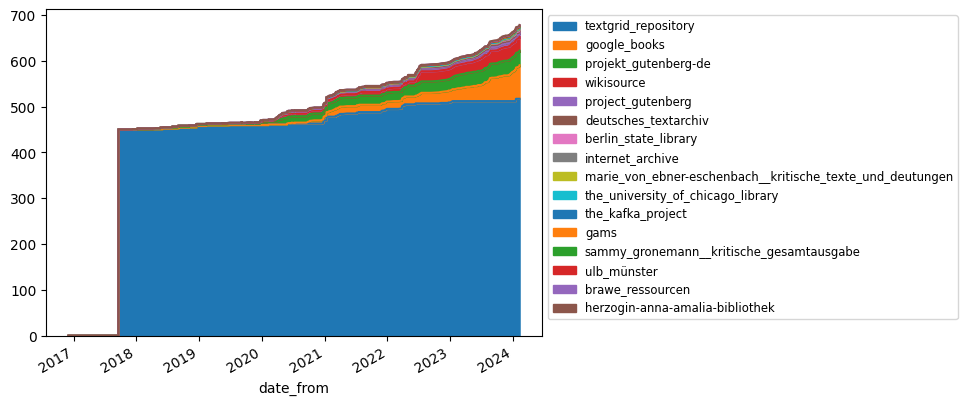

In [18]:
# This generates a quick (and messy) plot of the distribution of the sources

repo.plot_source_distribution_of_corpus_versions()

% The plot above should be redone and included as a figure in a markdown cell; label: Development of the Distribution of the Digital Sources of GerDraCor

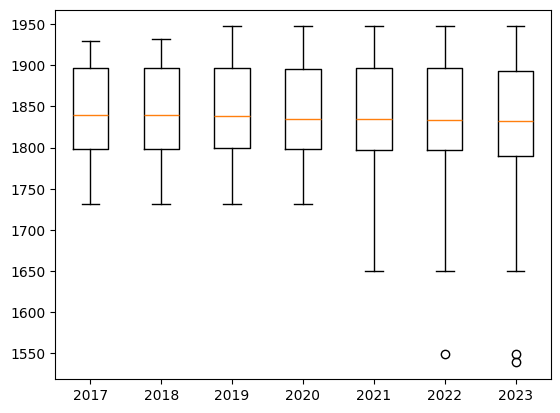

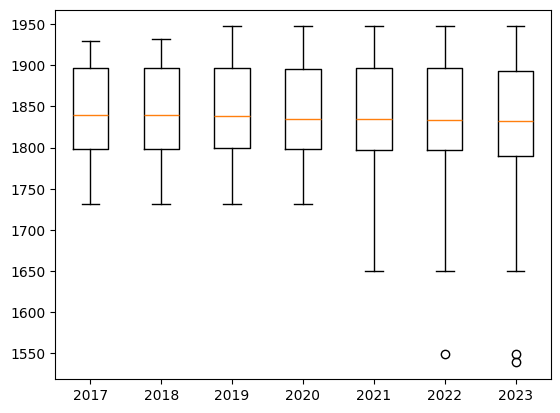

In [19]:
# Box plot of "YearNormalized" values per year
# This cell is removed from the final rendering of the report

plot_data = {}
for year in range(2017,2024):
    data = repo.get_years_of_plays_in_corpus_version_in_date_range_as_df(
        date_start=f"{str(year)}-01-01", 
        date_end=f"{str(year)}-12-31")["yearNormalized"].dropna()
    plot_data[str(year)] = data

fig, ax = plt.subplots()
ax.boxplot(plot_data.values())
ax.set_xticklabels(plot_data.keys())
glue("fig_boxplot_year_normalized", fig)

In the course of its existence, the GerDraCor corpus also expands in terms of the time period covered (see Fig. 5).

```{glue:figure} fig_boxplot_year_normalized
---
figwidth: 800px
name: fig_boxplot_year_normalized
---
Development of the time range ("YearNormalized") covered by GerDraCor
```

There is a second parameter that can be used to visualize the “growth” of a corpus – the sum of the file sizes of all TEI-XML documents in a corpus version. As expected, the overall size grows when adding plays to the corpus, but in 2017 it can also be observed that the overall size shrinks even though the number of plays stay the same. Still, plotting the size can be used to visualize changes when the overall number of documents stays the same, as happened in 2017, for example, when the total file sizes suddenly dropped. In this year no new plays were added to the corpus (see table in {numref}`tab_new_plays_per_year`).

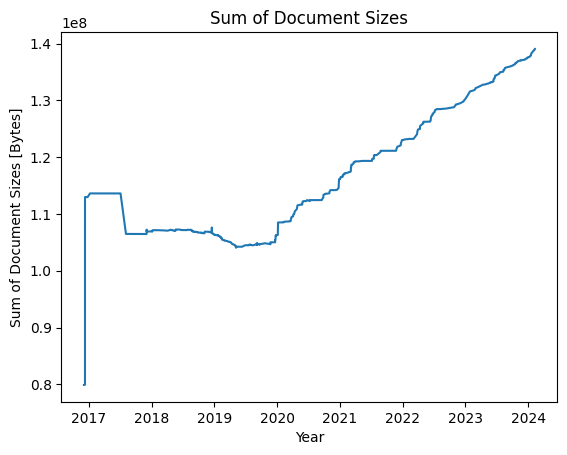

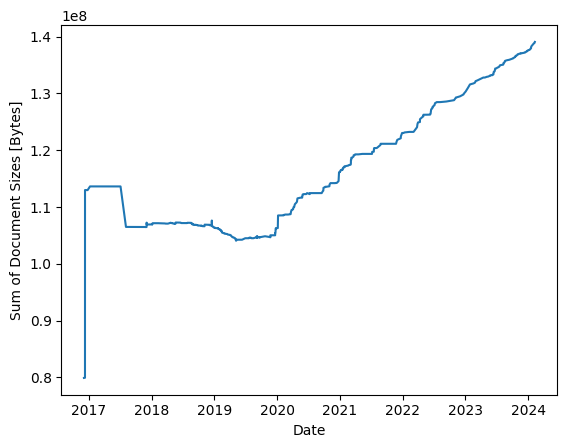

In [20]:
# Plot of the size of a corpus in bytes (sum of file sizes)
# This cell will not be rendered in the final report

# easy way to plot with the built in method
repo.plot_document_sizes_sum_in_corpus_versions(title="Sum of Document Sizes")

# Plot to a figure to later glue
document_sizes_sum_df = repo.get_corpus_versions_as_df(
    columns=["id", "date_from", "document_sizes_sum"])

document_sizes_sum_df_to_plot = document_sizes_sum_df.set_index("date_from")

fig_document_sizes_sum = plt.figure()

plt.ylabel("Sum of Document Sizes [Bytes]", figure=fig_document_sizes_sum)
plt.xlabel("Date", figure=fig_document_sizes_sum)

plt.plot(document_sizes_sum_df_to_plot["document_sizes_sum"], figure=fig_document_sizes_sum)

glue("fig_document_sizes_sum", fig_document_sizes_sum, display=False)

```{glue:figure} fig_document_sizes_sum
---
figwidth: 800px
name: fig_document_sizes_sum
---
Development of the sum of all document sizes in  all versions in GerDraCor
```

We don't want to go into detail about what happened in 2017. What is more important to us at this moment is something else that clarifies our understanding of living corpora. Living corpora are not only characterized by the fact that the number of documents they contain is growing. Rather, it is also the case that the documents from living corpora themselves can change (e.g. grow or shrink), because they are enriched by additional mark-up or homogenized, which can lead, for example, to mark-up or metadata being deleted from the files (as was the case in 2017, to solve this cliffhanger).

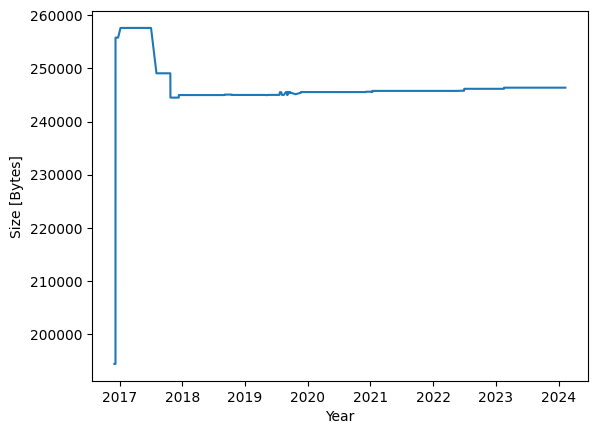

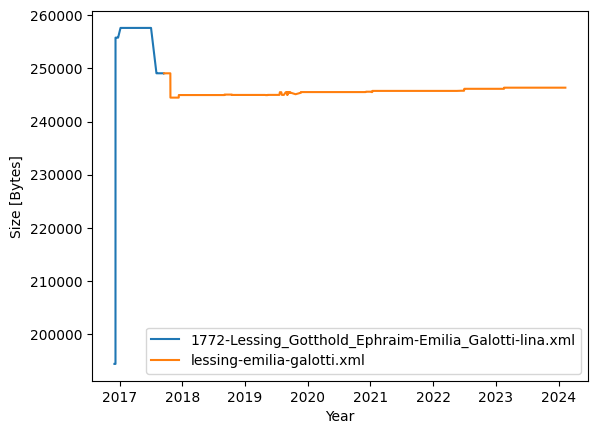

In [21]:
# Plot the development of the file size of Emilia Galotti
# The following plot also includes the date with the original file name

# A way to quickly do this:
#repo.plot_document_size_in_corpus_versions(name="1772-Lessing_Gotthold_Ephraim-Emilia_Galotti-lina")
#repo.plot_document_size_in_corpus_versions(name="lessing-emilia-galotti")

# Get the size values as data frames and remove the rows with no value in column "size"
df1 = repo.get_sizes_of_single_play_as_df(name="1772-Lessing_Gotthold_Ephraim-Emilia_Galotti-lina")
df1 = df1[df1["size"].notna()]

df2 = repo.get_sizes_of_single_play_as_df(name="lessing-emilia-galotti")
df2 = df2[df2["size"].notna()]

df1["date_from"] = pd.to_datetime(df1["date_from"])
df2["date_from"] = pd.to_datetime(df2["date_from"])

# This combines the two dataframes
galotti_size_df = pd.concat([df1, df2])
galotti_size_df = galotti_size_df.sort_values("date_from")

# Make the date row the index
galotti_size_df = galotti_size_df.set_index("date_from")

fig1 = plt.figure()

plt.ylabel("Size [Bytes]", figure=fig1)
plt.xlabel("Year", figure=fig1)

plt.plot(galotti_size_df["size"], figure=fig1)

glue("fig_galotti_file_size_development_v1", fig1, display=False)

# Second variant; plotting two lines to visually show the moment the file name changed
fig2 = plt.figure()

df1 = df1.set_index("date_from")
df2 = df2.set_index("date_from")

plt.ylabel("Size [Bytes]", figure=fig2)
plt.xlabel("Year", figure=fig2)
plt.plot(df1["size"], label="1772-Lessing_Gotthold_Ephraim-Emilia_Galotti-lina.xml", figure=fig2)
plt.plot(df2["size"], label="lessing-emilia-galotti.xml", figure=fig2)
plt.legend(loc="lower right")

glue("fig_galotti_file_size_development_v2", fig2, display=False)

In [22]:
# Data frame with the sizes of the file of Emilia Galotti
# This cell is not included in the final rendering of the report

galotti_size_df

,version,size
date_from,,
2016-12-02 09:31:24+00:00,2f4e830a852960eba8e05d6b622b3bd64911ab69,194399.0
2016-12-08 10:38:16+00:00,dc0e11872fe1437f564137fe377cb43675eead90,194399.0
2016-12-08 14:56:21+00:00,106fefd275c20c5b673a326e89647f7511ba9f76,255784.0
2016-12-16 22:57:08+00:00,97b9d67c84332b8a47da7177e38607589755ccab,255784.0
2016-12-17 13:56:23+00:00,792e255281e6075608f235847bce73ee530f49f3,255784.0
...,...,...
2024-02-04 14:11:47+00:00,231412fec0a5c06832ab1c34fb01e49d52d5248c,246370.0
2024-02-05 13:33:16+00:00,7799cc0a089a0727fdae7511cf76ad40d9370462,246370.0
2024-02-07 19:44:36+00:00,1a2bd807973f3bf052eee45eb343c7a752bd61bb,246370.0


In [23]:
# The steep increase in file size happens in version 106fefd275c20c5b673a326e89647f7511ba9f76
# this cell is not included in the final rendering of the report
print(repo.get_github_commit_url_of_version(version="106fefd275c20c5b673a326e89647f7511ba9f76"))

https://github.com/dracor-org/gerdracor/commit/106fefd275c20c5b673a326e89647f7511ba9f76


Plotting the file size over a period of time is also useful to understand if and when a single file has been subject to modification. As an example we plot the file size of each version of the XML file of the play *Emilia Galotti* by Gotthold Ephraim Lessing[^emilia_galotti_on_dracor] in {numref}`fig_galotti_file_size_development_v2`.

[^emilia_galotti_on_dracor]: The play can be accessed on DraCor at [https://dracor.org/id/ger000088](https://dracor.org/id/ger000088).

```{glue:figure} fig_galotti_file_size_development_v2
---
figwidth: 800px
name: fig_galotti_file_size_development_v2
---
Development of file size of the play *Emila Galotti* over all versions in GerDraCor
```

The change in color of the plotted line indicates the moment when the file was renamed from `1772-Lessing_Gotthold_Ephraim-Emilia_Galotti-lina.xml`[^galotti_file_version_1] to the still valid `lessing-emilia-galotti`. In the initial version of the XML file the metadata in the `<teiHeader>` was then based on the LINA file, but not in the format ("Zwischenformat") that is available as `lina88` on the [DLINA website](https://dlina.github.io/linas/lina88), but already encoded following the TEI Guidelines. The reference to DLINA is still kept in the TEI version in the `<publicationStmt>` encoded as an `<idno>` element until the version dated {glue:}`batch_edit_header_consistencies_version_date_formatted` (see {ref}`excursus_major_revisions` below). A reference to the  TextGrid Source is contained in the `<sourceDesc>` and tagged as `<bibl type="digitalSource">` including a [link](http://www.textgridrep.org/textgrid:rksp.0) to TextGrid in an `<idno>` element. 

The full text content taken from TextGrid was included in the initial version in the `<text>` element without any line breaks and intendations on a single line only. The text is formatted in the [third version](https://github.com/dracor-org/gerdracor/commit/106fefd275c20c5b673a326e89647f7511ba9f76#diff-0d89c2bc1b36f1ca71e870eeb075d3f23d463ac76716a6709d7b7d8705adff6e) (`106fefd275c20c5b673a326e89647f7511ba9f76`) which results in the steep increase of the file size. 

[^galotti_file_version_1]: On GitHub the file can be accessed [here](https://github.com/dracor-org/gerdracor/blob/2f4e830a852960eba8e05d6b622b3bd64911ab69/data/1772-Lessing_Gotthold_Ephraim-Emilia_Galotti-lina.xml).

In [24]:
# Modifications to Emilia Galotti (old filename, new filename)
# This cell is not included in the final rendering

galotti_modifying_versions = repo.get_corpus_versions_modifying_document(name="1772-Lessing_Gotthold_Ephraim-Emilia_Galotti-lina") + repo.get_corpus_versions_modifying_document(name="lessing-emilia-galotti")

glue("versions_modifying_galotti_count", len(galotti_modifying_versions))

versions_modifying_galotti_ids = [item["version"] for item in galotti_modifying_versions]
glue("versions_modifying_galotti_ids", versions_modifying_galotti_ids)

versions_modifying_galotti_links = [item["link"] for item in galotti_modifying_versions]
glue("versions_modifying_galotti_links", versions_modifying_galotti_links)

26

['3e92970c6c3901b7661a515ce504605fb819e37d',
 '5d4130230eb9b9f2820618089ed1cf774424f241',
 '51dd69475f14757992c77d9a04c19026295b5f7c',
 '5b41d0f8f11fa478cfa68f9dac54912e6b922a63',
 '7987eb78ecee670e999373d1917bf64b8b1e5253',
 'e8b7285eb4adbecebbcfcf53046f9a1093f25076',
 '879250ad0d9cc686dda930afa694d9461a0b5757',
 '8145e178ee1714ac115d2097e7c6df8cd1181e91',
 '1ab8c9b713a3eeaf5b25026e6036caaab230c119',
 'e8c21cfd3b76bdcb05c6174e2c2d237d0d07c21e',
 '23833340aa83b963205f583189206a9881e9869e',
 'd71e3d78562d8039f90bd21d88c6c7b67e912372',
 'b0c6457ed5233ca634650d853627ed4ffe5fba8a',
 'e1622273f41204a09d9af469d8f036a79b654af9',
 '1095d70934ab525f866a2f1978541eeedf618651',
 '8f0b2ac84f85ebf79df6b8aa0fb2d9662ee212ea',
 '9c2fcf55cce2ec6290ffc8615e98d9b2355707d9',
 '445a5b0fca0c96d7d4be7a9e8738a7c19cbe9cad',
 '7b4faf2f0d6e80a7e39052a38e12617453a1e5d2',
 '75b663876d1cd7b54235547ccd077a3299877a1c',
 'fe53f8f5d4d36794df55859e262e6d1b893ce705',
 'd23a93d9fa0e4eb53a580904ac5d01c8b8f8037c',
 '376cec4c

['https://github.com/dracor-org/gerdracor/commit/3e92970c6c3901b7661a515ce504605fb819e37d',
 'https://github.com/dracor-org/gerdracor/commit/5d4130230eb9b9f2820618089ed1cf774424f241',
 'https://github.com/dracor-org/gerdracor/commit/51dd69475f14757992c77d9a04c19026295b5f7c',
 'https://github.com/dracor-org/gerdracor/commit/5b41d0f8f11fa478cfa68f9dac54912e6b922a63',
 'https://github.com/dracor-org/gerdracor/commit/7987eb78ecee670e999373d1917bf64b8b1e5253',
 'https://github.com/dracor-org/gerdracor/commit/e8b7285eb4adbecebbcfcf53046f9a1093f25076',
 'https://github.com/dracor-org/gerdracor/commit/879250ad0d9cc686dda930afa694d9461a0b5757',
 'https://github.com/dracor-org/gerdracor/commit/8145e178ee1714ac115d2097e7c6df8cd1181e91',
 'https://github.com/dracor-org/gerdracor/commit/1ab8c9b713a3eeaf5b25026e6036caaab230c119',
 'https://github.com/dracor-org/gerdracor/commit/e8c21cfd3b76bdcb05c6174e2c2d237d0d07c21e',
 'https://github.com/dracor-org/gerdracor/commit/23833340aa83b963205f583189206a9

Overall we there are {glue}`versions_modifying_galotti_count` versions in which the XML file of *Emilia Galotti* is modified.[^version_ids_modifying_galotti]

[^version_ids_modifying_galotti]: The the identifiers of the versions in which the file is modified are as follows: {glue:text}`versions_modifying_galotti_ids`

(excursus_major_revisions)=
## Batch Edits as Major Revisions

One can differentiate (at least) two major types of modifications to the files in a corpus version: 
* Edits of single files only that bring a single file in shape;
* “Batch” edits that change all files at once.

The first edits need to be analyzed on an individual level. On a broader scale it must be said that these are, of course, relevant in reproduction studies because they might change, for example, the text resulting in different numbers of `<sp>`, stage direction, number of words, et cetera. We can always assume some effect on some of the metrics if there is a new version.[^irrelevant_modifications]

In the following, we identify and comment on the batch edits, because we assume that they introduce changes to the files that are the results of some automatic process, e.g. using element Y instead of X. 

[^irrelevant_modifications]:There might be commits/versions in which only non-(play)-document files changed; usually these are unproblematic because these modifications do not affect the metrics and data returned by the API or any parts of files that are normally subject to an analysis, like the full text.

In [25]:
# Get links to Corpus Versions that rename documents:
# This cell does not show up in the final rendering
for version in repo.get_ids_of_corpus_versions_renaming_documents():
    print(repo.get_github_commit_url_of_version(version=version))

https://github.com/dracor-org/gerdracor/commit/e18c322706417825229f1471b15bd6daaeaf3ab1
https://github.com/dracor-org/gerdracor/commit/fdac66ba90c2c094012dc90395e952411d324e4c
https://github.com/dracor-org/gerdracor/commit/1ca50e56d1733e7c9a609fe050342679f7bea232
https://github.com/dracor-org/gerdracor/commit/455ea2ba8863f177b326b60df30fc20c39094793
https://github.com/dracor-org/gerdracor/commit/096b0858d72b3d058280d1e7820430f20e59eaff
https://github.com/dracor-org/gerdracor/commit/73121e74d59238c26c7d28a74f726c55816271b2
https://github.com/dracor-org/gerdracor/commit/030d81ad6642241716b20cd2e15e721920f23783
https://github.com/dracor-org/gerdracor/commit/7b4faf2f0d6e80a7e39052a38e12617453a1e5d2
https://github.com/dracor-org/gerdracor/commit/28fb4de09fa8158d4ea2ed3f54430080327c25f3


In [26]:
# This is the version that changes the name from "data" to "tei"
# The output of the cell won't show up in the final rendering of the report

#repo.get_corpus_version(version="e18c322706417825229f1471b15bd6daaeaf3ab1")

In [27]:
# This is the second version that does some batch renaming.
# This cell won't show up in the final rendering of the report

# repo.get_corpus_version(version="fdac66ba90c2c094012dc90395e952411d324e4c")

In [28]:
# Get all renaming incidents apart from the batch renamings.
# This cell won't show up in the final rendering of the report.

rename_incidents = repo.get_renamed_files(
    exclude_versions=["e18c322706417825229f1471b15bd6daaeaf3ab1", 
                     "fdac66ba90c2c094012dc90395e952411d324e4c"])

renaming_affected_playnames = []
for item in rename_incidents:
    renaming_affected_playnames.append(item["new_filename"].split("/")[1].replace(".xml",""))

glue("renaming_affected_playnames", renaming_affected_playnames)

['goethe-faust-eine-tragoedie',
 'malss-die-jungfern-koechinnen',
 'neuber-die-beschuetzte-schauspielkunst',
 'neuber-die-verehrung-der-vollkommenheit',
 'lortzing-der-wildschuetz',
 'schlegel-alarcos',
 'hauptmann-die-ratten',
 'hauptmann-florian-geyer',
 'hauptmann-gabriel-schillings-flucht',
 'hauptmann-vor-sonnenaufgang',
 'holz-jerschke-traumulus',
 'holz-schlaf-die-familie-selicke',
 'laufs-jacoby-pension-schoeller',
 'seemann-dulk-die-waende',
 'stephanie-der-schauspieldirektor',
 'stephanie-die-entfuehrung-aus-dem-serail',
 'stephanie-die-liebe-im-narrenhause',
 'stephanie-doktor-und-apotheker',
 'barlach-der-blaue-boll']

In the case of the very early GerDraCor there are two commits that introduce significant changes to where files are stored in the repository and how they are named:[^changing_of_file_names] 

* With the [commit](https://github.com/dracor-org/gerdracor/commit/e18c322706417825229f1471b15bd6daaeaf3ab1) `e18c322706417825229f1471b15bd6daaeaf3ab1` dating from September 17, 2017 the folder containing the files is renamed from the initial `data` to `tei`.
* With the [commit](https://github.com/dracor-org/gerdracor/commit/fdac66ba90c2c094012dc90395e952411d324e4c) `fdac66ba90c2c094012dc90395e952411d324e4c`, on the same day, the file names of all TEI-XML files are changed to now match the identifier `playname`[^param_playname].

[^changing_of_file_names]: With the current setup of the the methods provided by our analysis tool `github_utils` it is necessary to take changes in file names into consideration if we want to investigate or visualize the changes of a file over the whole period. After the batch renaming in September 2017 the data folder name `tei` stays stable, but there is still some renaming happening. The method `get_ids_of_corpus_versions_renaming_documents` allows to retrieve the idendifiers of all versions in which document files are renamed. The method `get_renamed_files` returns dictionaries containing the version number as well as the old and the new filename. The following plays have been renamed after the above mentioned batch renaming: {glue:text}`renaming_affected_playnames`.

[^param_playname]: In the report "On Programmable Corpora" this is the feature "P3 play_name", see Tab. 02: Play Features on page 38. This identifier is used, for example, when requesting information about the play from the API: https://dracor.org/api/v1/corpora/ger/plays/lessing-emilia-galotti; Documentation of this API endpoint see https://dracor.org/doc/api#/public/play-info.

In [29]:
# Get the ids of commits changing all documents that are available at a time
# This cell won't show up in the final rendering

ids_of_batch_edits = repo.get_ids_of_corpus_versions_modifying_all_documents()
for id in ids_of_batch_edits:
    print(repo.get_github_commit_url_of_version(version=id))

glue("batch_edit_version_ids", ids_of_batch_edits)
glue("number_of_batch_edits", len(ids_of_batch_edits))

https://github.com/dracor-org/gerdracor/commit/3e92970c6c3901b7661a515ce504605fb819e37d
https://github.com/dracor-org/gerdracor/commit/7987eb78ecee670e999373d1917bf64b8b1e5253
https://github.com/dracor-org/gerdracor/commit/e8b7285eb4adbecebbcfcf53046f9a1093f25076
https://github.com/dracor-org/gerdracor/commit/8145e178ee1714ac115d2097e7c6df8cd1181e91
https://github.com/dracor-org/gerdracor/commit/e8c21cfd3b76bdcb05c6174e2c2d237d0d07c21e
https://github.com/dracor-org/gerdracor/commit/23833340aa83b963205f583189206a9881e9869e
https://github.com/dracor-org/gerdracor/commit/8f0b2ac84f85ebf79df6b8aa0fb2d9662ee212ea
https://github.com/dracor-org/gerdracor/commit/9c2fcf55cce2ec6290ffc8615e98d9b2355707d9
https://github.com/dracor-org/gerdracor/commit/75b663876d1cd7b54235547ccd077a3299877a1c
https://github.com/dracor-org/gerdracor/commit/fe53f8f5d4d36794df55859e262e6d1b893ce705
https://github.com/dracor-org/gerdracor/commit/d23a93d9fa0e4eb53a580904ac5d01c8b8f8037c


['3e92970c6c3901b7661a515ce504605fb819e37d',
 '7987eb78ecee670e999373d1917bf64b8b1e5253',
 'e8b7285eb4adbecebbcfcf53046f9a1093f25076',
 '8145e178ee1714ac115d2097e7c6df8cd1181e91',
 'e8c21cfd3b76bdcb05c6174e2c2d237d0d07c21e',
 '23833340aa83b963205f583189206a9881e9869e',
 '8f0b2ac84f85ebf79df6b8aa0fb2d9662ee212ea',
 '9c2fcf55cce2ec6290ffc8615e98d9b2355707d9',
 '75b663876d1cd7b54235547ccd077a3299877a1c',
 'fe53f8f5d4d36794df55859e262e6d1b893ce705',
 'd23a93d9fa0e4eb53a580904ac5d01c8b8f8037c']

11

There are {glue:text}`number_of_batch_edits` versions in which all TEI-files available at that time are modified at once. In the following we discuss the relevant ones.

% this will be removed
[3e92970c6c3901b7661a515ce504605fb819e37d](https://github.com/dracor-org/gerdracor/commit/3e92970c6c3901b7661a515ce504605fb819e37d)

* this is the commit that changes the relative path to the CSS

In [30]:
# this cell will be removed in the final rendering of the report

batch_edit_wikidata_ids_version = repo.get_corpus_version(
    version="7987eb78ecee670e999373d1917bf64b8b1e5253")


glue("batch_edit_wikidata_ids_version_overall_document_count", 
     batch_edit_wikidata_ids_version["document_count"])
glue("batch_edit_wikidata_ids_version_documents_affected_count", batch_edit_wikidata_ids_version["documents_affected_count"])

# Date (parsed to datetime)
batch_edit_wikidata_ids_version_date = datetime.fromisoformat(batch_edit_wikidata_ids_version["date_from"])

# Formatted date
glue("batch_edit_wikidata_ids_version_date_formatted", batch_edit_wikidata_ids_version_date.strftime("%-d %B, %Y"))


468

468

'3 September, 2018'

% 7987eb78ecee670e999373d1917bf64b8b1e5253 : this adds Wikidata IDs

* The [commit](https://github.com/dracor-org/gerdracor/commit/7987eb78ecee670e999373d1917bf64b8b1e5253) `7987eb78ecee670e999373d1917bf64b8b1e5253` dating from {glue:text}`batch_edit_wikidata_ids_version_date_formatted` adds Wikidata identifiers to {glue:}`batch_edit_wikidata_ids_version_documents_affected_count` of {glue:text}`batch_edit_wikidata_ids_version_documents_affected_count` play TEI files available at that time. The identifier is included as an element `<idno>` with the value `"wikidata"` of the attribute `@type` in `<publicationStmt>`. 

In [31]:
# Clean up revision desc 
# This cell is removed from the final rendering

batch_edit_revision_desc_version = repo.get_corpus_version(
    version="e8b7285eb4adbecebbcfcf53046f9a1093f25076")


glue("batch_edit_revision_desc_version_overall_document_count", 
     batch_edit_revision_desc_version["document_count"])
glue("batch_edit_revision_desc_version_documents_affected_count", batch_edit_revision_desc_version["documents_affected_count"])

# Date (parsed to datetime)
batch_edit_revision_desc_version_date = datetime.fromisoformat(batch_edit_revision_desc_version["date_from"])

# Formatted date
glue("batch_edit_revision_desc_version_date_formatted", batch_edit_revision_desc_version_date.strftime("%-d %B, %Y"))

468

468

'16 October, 2018'

% e8b7285eb4adbecebbcfcf53046f9a1093f25076 Batch edit `<revisionDesc>`

* The [commit](https://github.com/dracor-org/gerdracor/commit/e8b7285eb4adbecebbcfcf53046f9a1093f25076) `e8b7285eb4adbecebbcfcf53046f9a1093f25076` dating from {glue:text}`batch_edit_revision_desc_version_date_formatted` changes the `<revisionDesc>` of {glue:}`batch_edit_revision_desc_version_documents_affected_count` of {glue:text}`batch_edit_revision_desc_version_overall_document_count` play TEI files available at that time. This is a modification of all files that should not affect any metrics currently returned by the DraCor API.

In [32]:
# Commit message "establish header consistencies": DLINA to DraCor (finally)
# This cell is removed from the final rendering

batch_edit_header_consistencies_version = repo.get_corpus_version(
    version="8145e178ee1714ac115d2097e7c6df8cd1181e91")

glue("batch_edit_header_consistencies_version_overall_document_count", 
     batch_edit_header_consistencies_version["document_count"])
glue("batch_edit_header_consistencies_version_documents_affected_count", batch_edit_header_consistencies_version["documents_affected_count"])

# Date (parsed to datetime)
batch_edit_header_consistencies_version_date = datetime.fromisoformat(batch_edit_header_consistencies_version["date_from"])

# Formatted date
glue("batch_edit_header_consistencies_version_date_formatted", batch_edit_header_consistencies_version_date.strftime("%-d %B, %Y"))

472

472

'12 May, 2019'

% 8145e178ee1714ac115d2097e7c6df8cd1181e91 message "establish some teiHeader consistencies"

* The [commit](https://github.com/dracor-org/gerdracor/commit/8145e178ee1714ac115d2097e7c6df8cd1181e91) `8145e178ee1714ac115d2097e7c6df8cd1181e91` dating from {glue:text}`batch_edit_header_consistencies_version_date_formatted` mainly changes several elements in the `<teiHeader>` of {glue:}`batch_edit_header_consistencies_version_documents_affected_count` of {glue:text}`batch_edit_header_consistencies_version_overall_document_count` play TEI files available at that time:
    - the attribute `@xml:lang` is added to the root element `TEI` to encode the information  of the language a play is in
    - change Wikidata URIs in the element `<idno type="wikidata">` to right the correct URI pattern of `http://www.wikidata.org/entity/{Q}`
    - change the license from CC-BY to CC0 in the element `<licence>`
    - change DLINA into DraCor identifiers

With the initial version of GerDraCor the identifiers that were assigned to the TextGrid plays in the DLINA project were kept. These identifiers consisted of a running number that, in the case of the DLINA website was prefixed with `lina`. In this version of the corpus these identifiers were replaced with DraCor Identifiers that include the corpus identifier, e.g. `ger` followed by number with 6 digits. For example, in the case of the play *Emilia Galotti* the LINA identifier `88` or `lina88` as in the URL of the LINA on the DLINA Website becomes `ger000088`. 

This implies that all the 465 Identifiers of the DLINA-based plays in GerDraCor can be "converted" into the DLINA identifiers by just stripping the leading zeros and, in the case of the URL of the DLINA website, pre-pending `lina` in the URL `https://dlina.github.io/linas/lina{XXX}`, e.g. the DraCor identifier that is resolveable with the URL `https://dracor.org/id/ger000010` would result in `https://dlina.github.io/linas/lina10`. Vice versa `https://dlina.github.io/linas/lina465` would result in `https://dracor.org/id/ger000465` which is resolved to [https://dracor.org/ger/immermann-das-gericht-von-st-petersburg](https://dracor.org/ger/immermann-das-gericht-von-st-petersburg). 

The remaining major revision commits are:

In [33]:
# relaxNG schema
# cell removed in final rendering

batch_edit_relaxng_version = repo.get_corpus_version(
    version="e8c21cfd3b76bdcb05c6174e2c2d237d0d07c21e")

glue("batch_edit_relaxng_version_overall_document_count", 
     batch_edit_relaxng_version["document_count"])
glue("batch_edit_relaxng_version_documents_affected_count", batch_edit_relaxng_version["documents_affected_count"])

# Date (parsed to datetime)
batch_edit_relaxng_version_date = datetime.fromisoformat(batch_edit_relaxng_version["date_from"])

# Formatted date
glue("batch_edit_relaxng_version_date_formatted", batch_edit_relaxng_version_date.strftime("%-d %B, %Y"))

474

474

'7 September, 2019'

% e8c21cfd3b76bdcb05c6174e2c2d237d0d07c21e adds relaxNG schema generated from the ODD

* The [commit](https://github.com/dracor-org/gerdracor/commit/e8c21cfd3b76bdcb05c6174e2c2d237d0d07c21e) `e8c21cfd3b76bdcb05c6174e2c2d237d0d07c21e` dating from {glue:text}`batch_edit_relaxng_version_date_formatted` assignes a RelaxNG schema derived from the DraCor TEI ODD[^dracor_schema_repo] to {glue:}`batch_edit_relaxng_version_documents_affected_count` of {glue:text}`batch_edit_relaxng_version_overall_document_count` play TEI files available at that time.

[^dracor_schema_repo]: ODD and schema can be found in the GitHub repository https://github.com/dracor-org/dracor-schema. When using the ODD derived schema to validate TEI-XML files of corpus versions of the past it would be necessary to also use the respective version of the schema, which would need to be retrieved from the commit history of the schema repository. It would make changes in the encoding more transparent if, at least for schemas or ODD, somesort of explicit version numbers would be used that could be then referenced in the TEI files of the plays. The TEI Guidelines define an attribute `@version` (https://www.tei-c.org/release/doc/tei-p5-doc/en/html/ref-TEI.html#tei_att.version) which "specifies the *version number of the TEI Guidelines* [our emphasis] against which this document is valid". Strictly speaking, in the proposed use case the attribute would not point to an "official" TEI release but to a versioned ODD or `<schemaSpec>`element. This might be considered tag abuse and has still to be evaluated.

% [23833340aa83b963205f583189206a9881e9869e](https://github.com/dracor-org/gerdracor/commit/23833340aa83b963205f583189206a9881e9869e)
% may ignore this for now, again, something with schemas

In [34]:
# ISO language codes 
# cell removed in final rendering

batch_edit_iso639_version = repo.get_corpus_version(
    version="8f0b2ac84f85ebf79df6b8aa0fb2d9662ee212ea")

glue("batch_edit_iso639_version_overall_document_count", 
     batch_edit_iso639_version["document_count"])
glue("batch_edit_iso639_version_affected_count", batch_edit_iso639_version["documents_affected_count"])

# Date (parsed to datetime)
batch_edit_iso639_version_date = datetime.fromisoformat(batch_edit_iso639_version["date_from"])

# Formatted date
glue("batch_edit_iso639_version_date_formatted", batch_edit_iso639_version_date.strftime("%-d %B, %Y"))

480

480

'16 January, 2020'

% 8f0b2ac84f85ebf79df6b8aa0fb2d9662ee212ea change ISO language code

* The [commit](https://github.com/dracor-org/gerdracor/commit/8f0b2ac84f85ebf79df6b8aa0fb2d9662ee212ea) `8f0b2ac84f85ebf79df6b8aa0fb2d9662ee212ea` dating from {glue:text}`batch_edit_iso639_version_date_formatted` changes the values of the attribute `@xml:lang` of the root element `<TEI>` from ISO-639-1 to ISO-639-2 codes, e.g. from `"de"` to `"ger"` in {glue:text}`batch_edit_iso639_version_affected_count` of all {glue:text}`batch_edit_iso639_version_overall_document_count` play TEI files available at that time.

In [35]:
# Genre markup, date ranges

batch_edit_genre_markup_version = repo.get_corpus_version(
    version="9c2fcf55cce2ec6290ffc8615e98d9b2355707d9")

glue("batch_edit_genre_markup_version_overall_document_count", 
     batch_edit_genre_markup_version["document_count"])
glue("batch_edit_genre_markup_version_affected_count", batch_edit_genre_markup_version["documents_affected_count"])

# Date (parsed to datetime)
batch_edit_genre_markup_version_date = datetime.fromisoformat(batch_edit_genre_markup_version["date_from"])

# Formatted date
glue("batch_edit_genre_markup_version_date_formatted", batch_edit_genre_markup_version_date.strftime("%-d %B, %Y"))

510

510

'5 December, 2020'

%
[9c2fcf55cce2ec6290ffc8615e98d9b2355707d9](https://github.com/dracor-org/gerdracor/commit/9c2fcf55cce2ec6290ffc8615e98d9b2355707d9)

* The [commit](https://github.com/dracor-org/gerdracor/commit/9c2fcf55cce2ec6290ffc8615e98d9b2355707d9) `9c2fcf55cce2ec6290ffc8615e98d9b2355707d9` dating from {glue:text}`batch_edit_genre_markup_version_date_formatted` introduces the following modifications to {glue:text}`batch_edit_genre_markup_version_affected_count` of all {glue:text}`batch_edit_genre_markup_version_overall_document_count` play TEI files available at that time:
     - date ranges, e.g. of the date of first publication of a play, are encoded using the attributes `@notBefore` and `@notAfter`, e.g. a previous encoded time span as in `<date type="written" when="1885">1884–1885</date>` becomes `<date type="written" notBefore="1884" notAfter="1885">1884–1885</date>`.
     - The diverse genre terms encoded as element `<term>` in `<keywords>` in the `<textClass>` section of the header that have been available in previous versions, e.g. `<term type="genreTitle">Schattenspiel</term>`, `<term type="genreTitle">Studentenspiel</term>` are either removed (resulting in `<term type="genreTitle"/>`) or normalized, e.g. the german `<term type="genreTitle">Komödie</term>` becomes `<term type="genreTitle">Comedy</term>`.
     - In addition to the normalized genre terms genre information is encoded using the element `<classCode>` in `<textClass>` linking to some seltected concepts on Wikidata, e.g. `<classCode scheme="http://www.wikidata.org/entity/">Q40831</classCode>`. In this case the Wikidata identifier (Q-Number) identifies the concept "Comedy" on [Wikidata](https://www.wikidata.org/wiki/Q40831).[^genre_in_programmable_corpora_report] 

[^genre_in_programmable_corpora_report]: For the discussion of this encoding strategy and its implementation in the API see also the corresponding issue in the DraCor API repository: https://github.com/dracor-org/dracor-api/issues/120 (opened 3 December, 2020) which exemplifies the interdependence of API code and TEI-Encoding of the DraCor corpora. The class codes are the basis for the extractor mechanism allows to include genre information in the API respones, see feature "P22 play_genre_normalized" in Table 02: Play features in the Report on Programmable Corpora,  p. 38. Class codes that are supported are hard coded in the API code, e.g. https://github.com/dracor-org/dracor-api/blob/665ea3f07c3f0ab83566440436691ed73957b263/modules/config.xqm#L79-L89.

In [36]:
# standoff container

batch_edit_standoff_container_version = repo.get_corpus_version(
    version="75b663876d1cd7b54235547ccd077a3299877a1c")

glue("batch_edit_standoff_container_version_overall_document_count", 
     batch_edit_standoff_container_version["document_count"])
glue("batch_edit_standoff_container_version_affected_count", batch_edit_standoff_container_version["documents_affected_count"])

# Date (parsed to datetime)
batch_edit_standoff_container_version_date = datetime.fromisoformat(batch_edit_standoff_container_version["date_from"])

# Formatted date
glue("batch_edit_standoff_container_version_date_formatted", batch_edit_standoff_container_version_date.strftime("%-d %B, %Y"))

569

569

'16 May, 2022'

% 75b663876d1cd7b54235547ccd077a3299877a1c

* The [commit](https://github.com/dracor-org/gerdracor/commit/75b663876d1cd7b54235547ccd077a3299877a1c) `75b663876d1cd7b54235547ccd077a3299877a1c` dating from {glue:text}`batch_edit_standoff_container_version_date_formatted` introduces a new element `<standOff>` to hold context metadata to {glue:text}`batch_edit_standoff_container_version_affected_count` of all {glue:text}`batch_edit_standoff_container_version_overall_document_count` play TEI files available at that time.[^standoff_discussion]
    - The wikidata identifier, previously encoded as element `<idno>` is included in `<standOff>` as an element `<link>` with the value `"wikidata"` of the `@type` attribute and linking to the corresponding entity on Wikidata by including the concept URI in the `@target` attribute.
    - The dates (printed, written, premiered) are also moved to the `<standOff>` container and are encoded as a `<listEvent>` with typed `<event>` elements.
 
[^standoff_discussion]: The introduction of the `<standOff>` element is discussed in this issue in the DraCor schema repository: https://github.com/dracor-org/dracor-schema/issues/38 (the issue was opened on 14 March and closed on 2 July, 2022). This change of encoding is also a good example of the implications for other projects using DraCor corpora in their research: GerDraCor is used in several research projects, amongst them the [QuaDramA](https://quadrama.github.io). In this project two libraries to were developed: [DramaNLP](https://github.com/quadrama/DramaNLP) and [DramaAnalysis](https://github.com/quadrama/DramaAnalysis). DramaNLP is the tool that generates the data to be analyzed with the R library DramaAnalysis. The changes introduced in the GerDraCor version discussed above had to be incorporated into DramaNLP as well, see the respective [commit](https://github.com/quadrama/DramaNLP/issues/97) dating from 13 December, 2022.

% [fe53f8f5d4d36794df55859e262e6d1b893ce705](https://github.com/dracor-org/gerdracor/commit/fe53f8f5d4d36794df55859e262e6d1b893ce705)

% Merge pull request #16 from dracor-org/sourcedesc-to-standoff
% this dates from the same day as above; is the merge of the pull request to incorporate the changes above

In [37]:
# xml:id on root

batch_edit_xml_on_tei_version = repo.get_corpus_version(
    version="d23a93d9fa0e4eb53a580904ac5d01c8b8f8037c")

glue("batch_edit_xml_on_tei_version_overall_document_count", 
     batch_edit_standoff_container_version["document_count"])
glue("batch_edit_xml_on_tei_version_affected_count", batch_edit_xml_on_tei_version["documents_affected_count"])

# Date (parsed to datetime)
batch_edit_xml_on_tei_version_date = datetime.fromisoformat(batch_edit_xml_on_tei_version["date_from"])

# Formatted date
glue("batch_edit_xml_on_tei_version_date_formatted", batch_edit_xml_on_tei_version_date.strftime("%-d %B, %Y"))

569

569

'3 June, 2022'

% d23a93d9fa0e4eb53a580904ac5d01c8b8f8037c

* The [commit](https://github.com/dracor-org/gerdracor/commit/d23a93d9fa0e4eb53a580904ac5d01c8b8f8037c) `d23a93d9fa0e4eb53a580904ac5d01c8b8f8037c` dating from {glue:text}`batch_edit_xml_on_tei_version_date_formatted` adds the DraCor ID as the value of the attribute `@xml:id` to the root element `<TEI>` and changes the encoding of the reference to Wikidata from a `<link>` to a `<relation>` with the value `"wikidata"` of the attribute `@type` to {glue:text}`batch_edit_xml_on_tei_version_affected_count` of all {glue:text}`batch_edit_xml_on_tei_version_overall_document_count` play TEI files available at that time.

In this systematic perspective that is based on commits that change all files included in a corpus version at a time, we might still miss some important milestones in the development of the corpus if the respective changes in the encoding are not introduced at once but bit by bit to one or several files. For example, this is the case when introducing a new "feature", the encoding of social or familily character relations.[^relations_in_on_programmable_corpora_report] This feature was introduced to GerDraCor in cooperation with the QuaDramA project {cite:p}`wiedmer_2020_romeo`.[^social_relations_pull_request] The elements `<relation>` in a `<listRelation type="personal">`in the `<teiHeader>` were added to the files between September and November 2019 to 358 GerDraCor files.

[^relations_in_on_programmable_corpora_report]: Regarding the feature and its implementation in DraCor services refer to the Report "On Programmable Corpora", p.48f and p.62. 

[^social_relations_pull_request]: The [pull request](https://github.com/dracor-org/gerdracor/pull/10) that included the data into DraCor dates from November 24, 2019. 


What we have shown in this excursus was just a small example of the possibilities that a corpus archaeology can offer based on the information that the GitHub API makes available as the commit history. With the excursus, we wanted to illustrate how important it is from our perspective to familiarize oneself as comprehensively as possible with the epistemic objects of one's own research, i.e. –- in the case of CLS research — to gain a deep understanding of the origin, genesis and development of a corpus. 
